In [68]:
import tensorflow as tf
from models import classifier
import pandas as pd
import pathlib
from hyperparameters import *
from constants import *
from utils import data_loading
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [69]:
apes_info = pd.read_csv(APES_INFO_FILEPATH)
all_images_ids, train_ids, validation_ids, test_ids = data_loading.get_image_ids(apes_info, pathlib.Path(DATA_FILEPATH))

In [70]:
dataset = data_loading.load_full_dataset(DATA_FILEPATH, IMAGE_SIZE, all_images_ids)

Found 10000 files belonging to 10000 classes.


In [71]:
x_train = data_loading.load_specific_dataset(dataset, train_ids, None)
x_validation = data_loading.load_specific_dataset(dataset, validation_ids, None)
x_test = data_loading.load_specific_dataset(dataset, test_ids, None)

In [72]:
_, _, _, feature_value_names = data_loading.get_feature_dataset_y(apes_info, FEATURE_NAMES)

In [73]:
train_dataset_mouth, validation_dataset_mouth, test_dataset_mouth = data_loading.prepare_feature_dataset(
    apes_info, "Mouth", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_background, validation_dataset_background, test_dataset_background = data_loading.prepare_feature_dataset(
    apes_info, "Background", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_hat, validation_dataset_hat, test_dataset_hat = data_loading.prepare_feature_dataset(
    apes_info, "Hat", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_eyes, validation_dataset_eyes, test_dataset_eyes = data_loading.prepare_feature_dataset(
    apes_info, "Eyes", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_clothes, validation_dataset_clothes, test_dataset_clothes = data_loading.prepare_feature_dataset(
    apes_info, "Clothes", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_fur, validation_dataset_fur, test_dataset_fur = data_loading.prepare_feature_dataset(
    apes_info, "Fur", x_train, x_validation, x_test, BATCH_SIZE
)
train_dataset_earring, validation_dataset_earring, test_dataset_earring = data_loading.prepare_feature_dataset(
    apes_info, "Earring", x_train, x_validation, x_test, BATCH_SIZE
)

In [74]:
compile_classification_model_hyperparameters = {
    "optimizer": tf.keras.optimizers.legacy.Adam(),
    "loss": [tf.keras.losses.BinaryCrossentropy(from_logits=False)],
    "metrics": ["accuracy"],
}

In [75]:
mouth_classification_model = classifier.build_single_label_classifier(**MOUTH_CLASSIFICATION_MODEL_HYPERPARAMETERS)
mouth_classification_model.compile(**compile_classification_model_hyperparameters)
mouth_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_MOUTH_CLASSIFIER_FILEPATH, append=False)

In [76]:
mouth_classification_model.fit(
    train_dataset_mouth.repeat(STEPS_PER_EPOCH * 17),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=17,
    batch_size=None,
    validation_data=validation_dataset_mouth,
    callbacks=[mouth_csv_logger],
)
mouth_classification_model.save_weights(MODEL_MOUTH_CLASSIFIER_FILEPATH)

In [77]:
background_classification_model = classifier.build_single_label_classifier(
    **BACKGROUND_CLASSIFICATION_MODEL_HYPERPARAMETERS
)
background_classification_model.compile(**compile_classification_model_hyperparameters)
background_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_BACKGROUND_CLASSIFIER_FILEPATH, append=False)

In [118]:
background_classification_model.fit(
    train_dataset_background.repeat(STEPS_PER_EPOCH * 6),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=6,
    batch_size=None,
    validation_data=validation_dataset_background,
    callbacks=[background_csv_logger],
)
background_classification_model.save_weights(MODEL_BACKGROUND_CLASSIFIER_FILEPATH)

Epoch 1/6


2023-05-30 21:12:05.235475: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [7000,8]
	 [[{{node Placeholder/_12}}]]
2023-05-30 21:12:05.235630: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]


54/54 [==============================] - ETA: 0s - loss: 0.6182 - accuracy: 0.3186

2023-05-30 21:12:20.211976: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-05-30 21:12:20.212138: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,8]
	 [[{{node Placeholder/_12}}]]


54/54 [==============================] - 30s 549ms/step - loss: 0.6182 - accuracy: 0.3186 - val_loss: 0.6233 - val_accuracy: 0.0000e+00
Epoch 2/6
54/54 [==============================] - 32s 611ms/step - loss: 0.4422 - accuracy: 0.5795 - val_loss: 0.5156 - val_accuracy: 0.4933
Epoch 3/6
54/54 [==============================] - 33s 623ms/step - loss: 0.3360 - accuracy: 0.7350 - val_loss: 0.4259 - val_accuracy: 0.6153
Epoch 4/6
54/54 [==============================] - 33s 615ms/step - loss: 0.2625 - accuracy: 0.7861 - val_loss: 0.3549 - val_accuracy: 0.6340
Epoch 5/6
54/54 [==============================] - 34s 635ms/step - loss: 0.2056 - accuracy: 0.8529 - val_loss: 0.2860 - val_accuracy: 0.7673
Epoch 6/6
54/54 [==============================] - 33s 623ms/step - loss: 0.1620 - accuracy: 0.9360 - val_loss: 0.2506 - val_accuracy: 0.6380


In [79]:
hat_classification_model = classifier.build_single_label_classifier(**HAT_CLASSIFICATION_MODEL_HYPERPARAMETERS)
hat_classification_model.compile(**compile_classification_model_hyperparameters)
hat_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_HAT_CLASSIFIER_FILEPATH, append=False)

In [80]:
hat_classification_model.fit(
    train_dataset_hat.repeat(STEPS_PER_EPOCH * 15),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=15,
    batch_size=None,
    validation_data=validation_dataset_hat,
    callbacks=[hat_csv_logger],
)
hat_classification_model.save_weights(MODEL_HAT_CLASSIFIER_FILEPATH)

In [81]:
eyes_classification_model = classifier.build_single_label_classifier(**EYES_CLASSIFICATION_MODEL_HYPERPARAMETERS)
eyes_classification_model.compile(**compile_classification_model_hyperparameters)
eyes_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_EYES_CLASSIFIER_FILEPATH, append=False)

In [82]:
eyes_classification_model.fit(
    train_dataset_eyes.repeat(STEPS_PER_EPOCH * 10),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=10,
    batch_size=None,
    validation_data=validation_dataset_eyes,
    callbacks=[eyes_csv_logger],
)
eyes_classification_model.save_weights(MODEL_EYES_CLASSIFIER_FILEPATH)

In [83]:
clothes_classification_model = classifier.build_single_label_classifier(**CLOTHES_CLASSIFICATION_MODEL_HYPERPARAMETERS)
clothes_classification_model.compile(**compile_classification_model_hyperparameters)
clothes_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_CLOTHES_CLASSIFIER_FILEPATH, append=False)

In [84]:
clothes_classification_model.fit(
    train_dataset_clothes.repeat(STEPS_PER_EPOCH * 13),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=13,
    batch_size=None,
    validation_data=validation_dataset_clothes,
    callbacks=[clothes_csv_logger],
)
clothes_classification_model.save_weights(MODEL_CLOTHES_CLASSIFIER_FILEPATH)

In [85]:
fur_classification_model = classifier.build_single_label_classifier(**FUR_CLASSIFICATION_MODEL_HYPERPARAMETERS)
fur_classification_model.compile(**compile_classification_model_hyperparameters)
fur_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_FUR_CLASSIFIER_FILEPATH, append=False)

In [86]:
fur_classification_model.fit(
    train_dataset_fur.repeat(STEPS_PER_EPOCH * 12),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=12,
    batch_size=None,
    validation_data=validation_dataset_fur,
    callbacks=[fur_csv_logger],
)
fur_classification_model.save_weights(MODEL_FUR_CLASSIFIER_FILEPATH)

In [87]:
earring_classification_model = classifier.build_single_label_classifier(**EARRING_CLASSIFICATION_MODEL_HYPERPARAMETERS)
earring_classification_model.compile(**compile_classification_model_hyperparameters)
earring_csv_logger = tf.keras.callbacks.CSVLogger(HISTORY_EARRING_CLASSIFIER_FILEPATH, append=False)

In [89]:
earring_classification_model.fit(
    train_dataset_earring.repeat(STEPS_PER_EPOCH * 10),
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=10,
    batch_size=None,
    validation_data=validation_dataset_earring,
    callbacks=[earring_csv_logger],
)
earring_classification_model.save_weights(MODEL_EARRING_CLASSIFIER_FILEPATH)

Epoch 1/10


2023-05-30 21:03:21.449910: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [7000,7]
	 [[{{node Placeholder/_12}}]]
2023-05-30 21:03:21.450310: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [7000,7]
	 [[{{node Placeholder/_12}}]]


 6/54 [==>...........................] - ETA: 14s - loss: 0.8321 - accuracy: 0.1029

KeyboardInterrupt: 

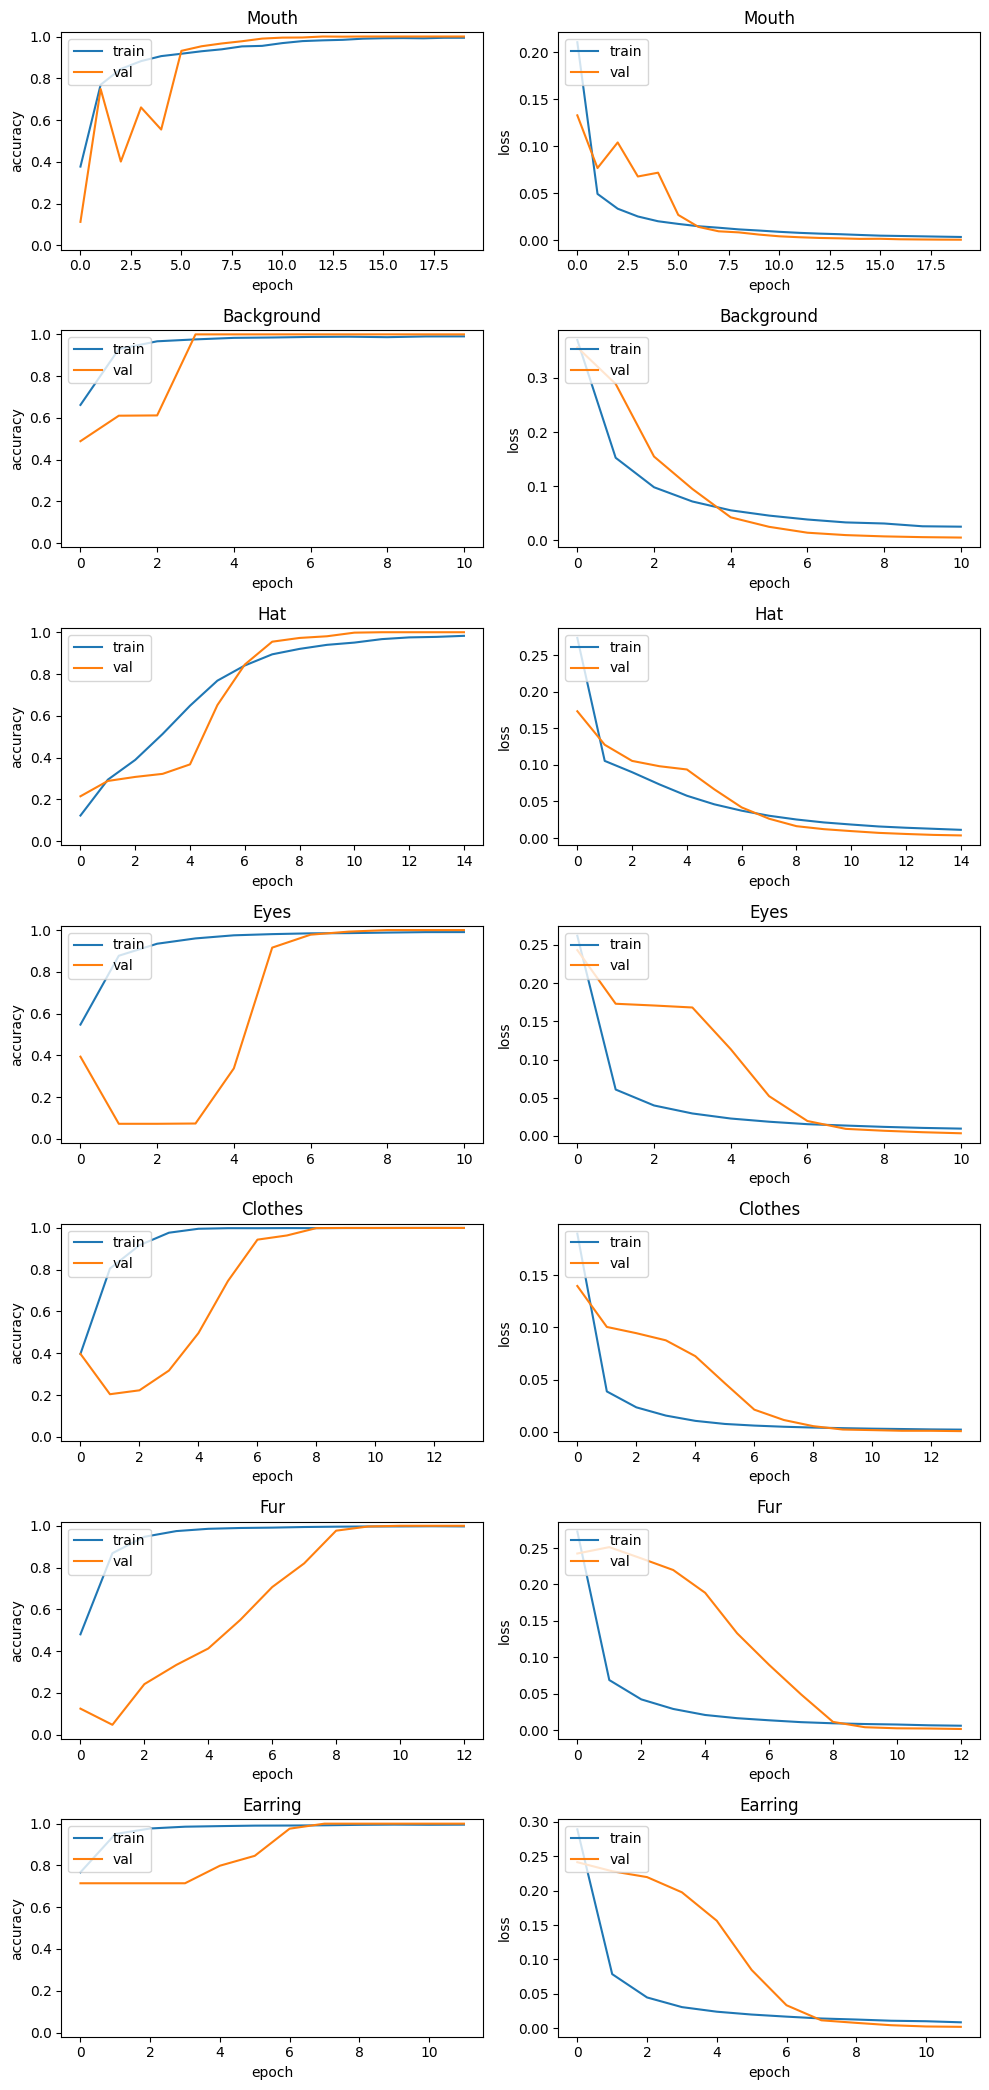

In [90]:
histories_classifiers_training = [
    pd.read_csv(HISTORY_MOUTH_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_BACKGROUND_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_HAT_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_EYES_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_CLOTHES_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_FUR_CLASSIFIER_FILEPATH),
    pd.read_csv(HISTORY_EARRING_CLASSIFIER_FILEPATH),
]

plt.figure(figsize=(10, len(FEATURE_NAMES) * 3))

for i, feature_name in enumerate(FEATURE_NAMES):
    plt.subplot(len(FEATURE_NAMES), 2, i * 2 + 1)
    plt.plot(histories_classifiers_training[i]["accuracy"])
    plt.plot(histories_classifiers_training[i][f"val_accuracy"])
    plt.title(feature_name)
    plt.ylim([-0.02, 1.02])
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "val"], loc="upper left")

    plt.subplot(len(FEATURE_NAMES), 2, i * 2 + 2)
    plt.plot(histories_classifiers_training[i]["loss"])
    plt.plot(histories_classifiers_training[i]["val_loss"])
    plt.title(feature_name)
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "val"], loc="upper left")

plt.tight_layout()
plt.show()

In [119]:
models = [
    mouth_classification_model,
    background_classification_model,
    hat_classification_model,
    eyes_classification_model,
    clothes_classification_model,
    fur_classification_model,
    earring_classification_model,
]

model_filepaths = [
    MODEL_MOUTH_CLASSIFIER_FILEPATH,
    MODEL_BACKGROUND_CLASSIFIER_FILEPATH,
    MODEL_HAT_CLASSIFIER_FILEPATH,
    MODEL_EYES_CLASSIFIER_FILEPATH,
    MODEL_CLOTHES_CLASSIFIER_FILEPATH,
    MODEL_FUR_CLASSIFIER_FILEPATH,
    MODEL_EARRING_CLASSIFIER_FILEPATH,
]
test_datasets = [
    test_dataset_mouth,
    test_dataset_background,
    test_dataset_hat,
    test_dataset_eyes,
    test_dataset_clothes,
    test_dataset_fur,
    test_dataset_earring,
]

In [144]:
def make_predictions(model, model_filepath, test_dataset):
    model.load_weights(model_filepath)

    return (
        model.predict(test_dataset.unbatch().batch(1)),
        list(test_dataset.unbatch().batch(1).map(lambda x, y: y)),
    )

y_test_predictions = []
y_test_true = []

for mod, mod_fp, t_ds in zip(models, model_filepaths, test_datasets):
    y_predictions, y_true = make_predictions(mod, mod_fp, t_ds)
    y_test_predictions.append(y_predictions)
    y_test_true.append(y_true)

2023-05-30 21:22:38.693792: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,33]
	 [[{{node Placeholder/_12}}]]
2023-05-30 21:22:38.693933: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]


1500/1500 [==============================] - 17s 11ms/step


2023-05-30 21:22:55.820439: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,33]
	 [[{{node Placeholder/_12}}]]
2023-05-30 21:22:55.820568: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]
2023-05-30 21:23:10.322230: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1

1500/1500 [==============================] - 15s 9ms/step


2023-05-30 21:23:25.372710: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,8]
	 [[{{node Placeholder/_12}}]]
2023-05-30 21:23:25.372844: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,8]
	 [[{{node Placeholder/_12}}]]
2023-05-30 21:23:39.841140: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1

1500/1500 [==============================] - 16s 10ms/step


2023-05-30 21:23:56.056469: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,37]
	 [[{{node Placeholder/_12}}]]
2023-05-30 21:23:56.056610: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-05-30 21:24:10.421571: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [

1500/1500 [==============================] - 16s 10ms/step


2023-05-30 21:24:26.227545: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,23]
	 [[{{node Placeholder/_12}}]]
2023-05-30 21:24:26.227673: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [10000]
	 [[{{node Placeholder/_4}}]]
2023-05-30 21:24:40.610164: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1

1500/1500 [==============================] - 15s 9ms/step


2023-05-30 21:24:56.119817: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,44]
	 [[{{node Placeholder/_12}}]]
2023-05-30 21:24:56.119943: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,44]
	 [[{{node Placeholder/_12}}]]
2023-05-30 21:25:10.686320: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape

1500/1500 [==============================] - 16s 10ms/step


2023-05-30 21:25:27.014458: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [10000]
	 [[{{node Placeholder/_0}}]]
2023-05-30 21:25:27.014588: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,19]
	 [[{{node Placeholder/_12}}]]
2023-05-30 21:25:41.395262: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1

1500/1500 [==============================] - 15s 9ms/step


2023-05-30 21:25:56.377162: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,7]
	 [[{{node Placeholder/_12}}]]
2023-05-30 21:25:56.377291: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_12' with dtype bool and shape [1500,7]
	 [[{{node Placeholder/_12}}]]


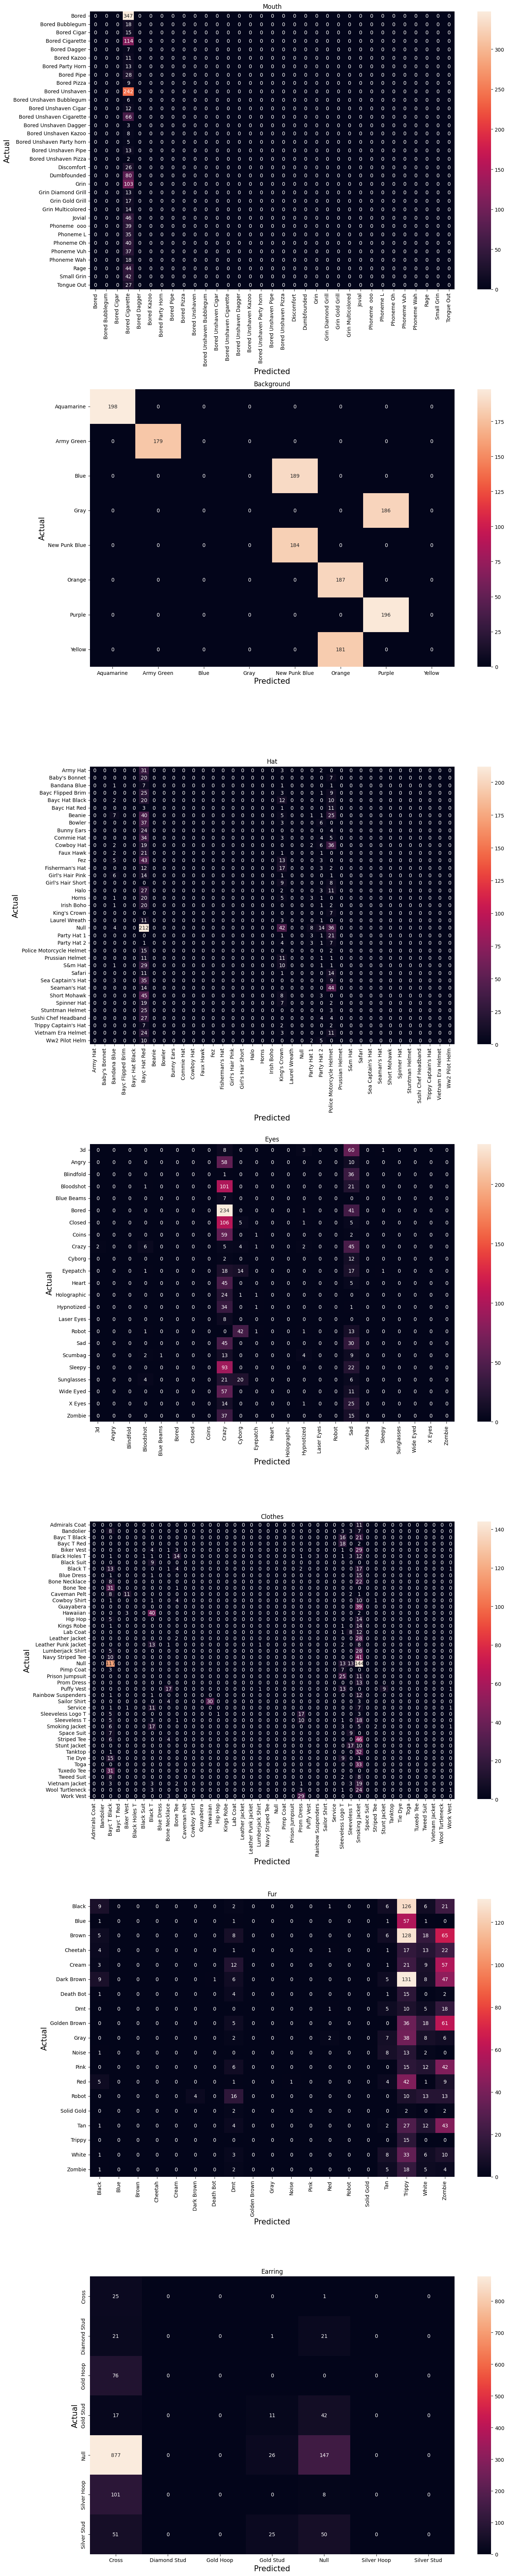

In [148]:
plt.figure(figsize=(15, len(FEATURE_NAMES) * 10))

for i, feature_name in enumerate(FEATURE_NAMES):
    cfm = confusion_matrix([np.argmax(x) for x in y_test_true[i]], [np.argmax(x) for x in y_test_predictions[i]])
    df_cfm = pd.DataFrame(cfm, index=feature_value_names[feature_name], columns=feature_value_names[feature_name])

    plt.subplot(len(FEATURE_NAMES), 1, i + 1)
    sns.heatmap(df_cfm, annot=True, fmt=".0f")
    plt.title(feature_name)
    plt.xlabel("Predicted", fontsize=15)
    plt.ylabel("Actual", fontsize=15)

plt.tight_layout()
plt.show()